---
# Séance 2 Onde complexe et systèmes linéaire
---


| Revenir à la [page déroulement](Readme.md) |
|-------------|


## À faire
---


* Terminer l'exo 2.1 (signaux a, b et c) avec l'approche indiquée :
    - schéma bloc de somme de " retards + intégrales + gain " transformant une impulsion unité (Dirac en 0)
    - traduction en somme de "fonctions de base" (échelon unité, voire rampes unités)
    - VÉRIFIER ! Prendre une valeur de t un peu avant 3 et calculer pour voir si ça colle.

* Ne pas faire le 2.2 tout de suite, mais avant de passer au 4, d'abord faire le lien entre les 3 représentations d'une onde pure : cos déphasé, représentation IQ (cos + sin) et représentation par phaseur (exponentielles complexes)

* Pour cela regarder la [fiche de récapitulation](./phaseur_onde_IQ.pdf)

* Faire le lien entre les trois représentations et retrouver les formules passages entre IQ, amplitude déphasage, et phaseur.

* Faites l'exercice 4
    -  Ex. 4a,b en utilisant au maximum le phaseur (qui est la fonction de transfert prise pour une valeur de la pulsation $\omega$). On comprend alors que pour la pulsation $\omega=2\pi$ le système ne fait que multiplier le phaseur du signal d'entré par le phaseur du système ($g(\omega=2\pi)=\frac{1}{2}e^{i\frac{pi}{3}}$)
    - Ex 4c. D'abord calculer le phaseur $z_e$ du signal d'entrée qui est donné sous la forme IQ. Et appliquer la linéarité du système $\Sigma[t\mapsto z_e.e^{i\omega t}]=z_e\,\Sigma[t \mapsto e^{i\omega t}]$ où $\Sigma$ est un opérateur (application linéaire qui transforme une fonction en fonction) transformant un signal d'entré $x$ en signal de sortie $y$ soit $\Sigma[x]=y$. Attention x et y sont bien des fonctions ! 


## En séance 
---


Présentation complète du passage entre les visions de l'onde complexe :
* cosinus amplitude déphasage
* IQ
* phaseur d'onde complexe

Revue de l'exercice 4 complète






In [1]:
anim

error: 'anim' undefined near line 1 column 1


error: graphics_toolkit: qt toolkit is not available
error: called from
    graphics_toolkit at line 81 column 5


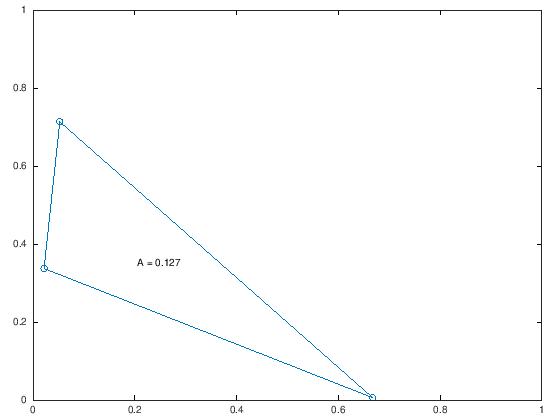

In [2]:
clear all
graphics_toolkit qt
set (0, "defaultlinelinewidth", 2);

h.points = rand (2, 3);         # 3 random points
h.line = [];
h.marker = [];
set (gcf, "userdata", h)

function down_fig (hsrc, evt)

  h = get (hsrc, "userdata");
  if (isempty (h.marker))
    hold on
    h.marker = plot (NA, NA, "o", "markersize", 15, "color", "green");
    hold off
  endif

  set (hsrc, "userdata", h);
  drag_fig (hsrc, evt);
endfunction

function drag_fig (hsrc, evt)

  # evt 1:left button, 2:middle button, 3:right button
  h = get (hsrc, "userdata");

  if (! isempty (h.marker))
    c = get (gca, "currentpoint")([1;3]);
    set (h.marker, "xdata", c(1));
    set (h.marker, "ydata", c(2));

    # find nearest point
    d = h.points - c;
    [~, idx] = min (hypot (d(1, :), d(2, :)));
    h.points(:, idx) = c;

  endif

  # draw / update the line
  tmp = [h.points h.points(:,1)]; # duplicate first point to close triangle
  if (isempty (h.line))
    h.line = plot (tmp(1, :), tmp(2, :), "-o");
    h.text = text (NA, NA, "", "horizontalalignment", "center");
    ## testing
    axis ([0 1 0 1])
  else
    set (h.line, "xdata", tmp(1, :));
    set (h.line, "ydata", tmp(2, :));
  endif

  # calculate the area
  A = polyarea (h.points(1, :),
                h.points(2, :));
  P = mean (h.points, 2);
  set (h.text, "position", mean (h.points, 2).');
  set (h.text, "string", sprintf ("A = %.3f", A));

  set (hsrc, "userdata", h);

endfunction

function up_fig (hsrc, evt)

  h = get (gcbf, "userdata");
  delete (h.marker);
  h.marker = [];
  set (gcbf, "userdata", h);

endfunction

set (gcf, "windowbuttondownfcn", @down_fig);
set (gcf, "windowbuttonmotionfcn", @drag_fig)
set (gcf, "windowbuttonupfcn", @up_fig)

# first update
drag_fig (gcf, [])